<a href="https://colab.research.google.com/github/yuanxzMST/seismic-analysis-in-Python/blob/main/ExamineCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleanse

In [2]:
# import files
from google.colab import files
uploaded = files.upload()

Saving hist.csv to hist.csv
Saving sas.csv to sas.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "hist.csv" with length 4583277 bytes
User uploaded file "sas.csv" with length 20288888 bytes


In [4]:
# read the csv files
import pandas as pd
hist_data = pd.read_csv('hist.csv')
scal_data = pd.read_csv('sas.csv')

In [9]:
hist_data[:5]

,name,PGA,ASQ,ARS,Ia,Arms,Ic,EPA,SaTf1,CSA,ASI,CAV,PGV,VSQ,VRS,Vrms,Ih,CAD,SvTf1,VC1,VC2,PGD,DSQ,DRS,Drms,CAI,DC,T1,T2,T3,T4,RVA,RDV,SdTf1,SaTf2,SvTf2,SdTf2,SaTf3,SvTf3,SdTf3,...,Col132sec1SStrainTop,Col132sec5SStrainBot,Col132sec5SStrainTop,Col133sec1SStrainBot,Col133sec1SStrainTop,Col133sec5SStrainBot,Col133sec5SStrainTop,Col134sec1SStrainBot,Col134sec1SStrainTop,Col134sec5SStrainBot,Col134sec5SStrainTop,Col135sec1SStrainBot,Col135sec1SStrainTop,Col135sec5SStrainBot,Col135sec5SStrainTop,Col141sec1SStrainBot,Col141sec1SStrainTop,Col141sec5SStrainBot,Col141sec5SStrainTop,Col142sec1SStrainBot,Col142sec1SStrainTop,Col142sec5SStrainBot,Col142sec5SStrainTop,Col143sec1SStrainBot,Col143sec1SStrainTop,Col143sec5SStrainBot,Col143sec5SStrainTop,Col144sec1SStrainBot,Col144sec1SStrainTop,Col144sec5SStrainBot,Col144sec5SStrainTop,Col145sec1SStrainBot,Col145sec1SStrainTop,Col145sec5SStrainBot,Col145sec5SStrainTop,drift01,drift12,drift23,drift34,midr
0,RSN1000_NORTHR_PIC180,1.827211,1.638467,1.280026,0.262355,0.202415,0.348803,1.416011,3.027794,1.607480,1.113679,4.533546,0.142719,0.023363,0.152849,0.024171,0.465183,0.634740,0.348154,0.279311,0.668545,0.023963,0.002253,0.047470,0.007507,0.224549,0.058662,7.41,14.670,23.20,9.35,0.078107,0.167907,0.040033,2.233328,0.083276,0.003105,3.105322,0.054655,0.000962,...,0.000894,0.000731,0.000634,0.000696,0.000824,0.000652,0.000708,0.000629,0.000790,0.000657,0.000805,0.000756,0.000639,0.001316,0.001022,0.000441,0.000489,0.001437,0.006247,0.000250,0.000213,0.000472,0.000423,0.000211,0.000259,0.000563,0.000524,0.000172,0.000301,0.000560,0.000516,0.000467,0.000411,0.001418,0.000843,0.000257,0.000152,-0.000698,-0.000346,0.000698
1,RSN1007_NORTHR_UNI095,2.097967,3.360271,1.833104,0.538053,0.289875,0.546242,1.360357,1.603724,1.028202,1.774131,6.332348,0.107912,0.017312,0.131575,0.020806,0.362586,0.533410,0.184406,0.201884,0.522506,0.023500,0.002482,0.049822,0.007879,0.209430,0.054173,6.64,12.250,25.29,11.86,0.051436,0.217773,0.021204,6.080248,0.226721,0.008454,4.478751,0.078827,0.001387,...,0.000590,0.000479,0.000466,0.000629,0.000567,0.000454,0.000488,0.000660,0.000557,0.000438,0.000519,0.000869,0.000906,0.000620,0.000728,0.000687,0.000602,0.000889,0.001582,0.000341,0.000303,0.000347,0.000463,0.000315,0.000329,0.000372,0.000432,0.000284,0.000360,0.000399,0.000378,0.000609,0.000692,0.001834,0.000960,-0.000641,-0.001017,-0.001224,-0.000441,0.001224
2,RSN1115_KOBE_SKI000,1.493769,3.884159,1.970827,0.621939,0.140043,0.406080,1.917325,2.347829,1.798432,1.591517,13.132979,0.158245,0.263976,0.513786,0.036509,0.734004,4.889901,0.269967,0.440495,1.145603,0.103713,0.157905,0.397373,0.028236,4.466482,0.406114,10.57,60.040,62.09,14.92,0.105937,0.655396,0.031042,5.202475,0.193990,0.007234,3.397511,0.059797,0.001052,...,0.000626,0.000591,0.000491,0.000603,0.000599,0.000567,0.000513,0.000636,0.000588,0.000556,0.000542,0.000804,0.000755,0.000672,0.000760,0.000663,0.000596,0.000953,0.001809,0.000326,0.000270,0.000373,0.000444,0.000290,0.000303,0.000427,0.000410,0.000259,0.000329,0.000459,0.000354,0.000562,0.000596,0.001702,0.000923,0.000141,0.000610,0.000979,0.001143,0.001143
3,RSN4177_NIIGATA_GNM009EW,1.532518,0.747289,0.864459,0.119657,0.078924,0.073337,0.355474,0.334153,0.115920,0.622636,3.259330,0.028878,0.000970,0.031146,0.002844,0.062865,0.172391,0.038423,0.052520,0.208955,0.015163,0.000776,0.027865,0.002544,0.157375,0.033660,4.12,10.940,11.69,2.79,0.018844,0.525061,0.004418,1.313138,0.048964,0.001826,5.166206,0.090927,0.001600,...,0.000285,0.000264,0.000212,0.000239,0.000273,0.000248,0.000230,0.000258,0.000272,0.000242,0.000255,0.000418,0.000195,0.000203,0.000420,0.000330,0.000408,0.000588,0.000694,0.000181,0.000141,0.000130,0.000170,0.000159,0.000165,0.000158,0.000142,0.000145,0.000196,0.000187,0.000114,0.000417,0.000345,0.000630,0.000560,0.000032,0.000229,0.000252,0.000227,0.000252
4,RSN418_COALINGA_F-CHP000,4.720964,3.599469,1.897227,0.576354,0.244941,0.204112,1.956986,1.607552,0.905757,3.351562,3.449444,0.146641

In [5]:
scal_data[:5]

,name,PGA,ASQ,ARS,Ia,Arms,Ic,EPA,SaTf1,CSA,ASI,CAV,PGV,VSQ,VRS,Vrms,Ih,CAD,SvTf1,VC1,VC2,PGD,DSQ,DRS,Drms,CAI,DC,T1,T2,T3,T4,RVA,RDV,SdTf1,SaTf2,SvTf2,SdTf2,SaTf3,SvTf3,SdTf3,...,Col132sec1SStrainBot,Col132sec1SStrainTop,Col132sec5SStrainBot,Col132sec5SStrainTop,Col133sec1SStrainBot,Col133sec1SStrainTop,Col133sec5SStrainBot,Col133sec5SStrainTop,Col134sec1SStrainBot,Col134sec1SStrainTop,Col134sec5SStrainBot,Col134sec5SStrainTop,Col135sec1SStrainBot,Col135sec1SStrainTop,Col135sec5SStrainBot,Col135sec5SStrainTop,Col141sec1SStrainBot,Col141sec1SStrainTop,Col141sec5SStrainBot,Col141sec5SStrainTop,Col142sec1SStrainBot,Col142sec1SStrainTop,Col142sec5SStrainBot,Col142sec5SStrainTop,Col143sec1SStrainBot,Col143sec1SStrainTop,Col143sec5SStrainBot,Col143sec5SStrainTop,Col144sec1SStrainBot,Col144sec1SStrainTop,Col144sec5SStrainBot,Col144sec5SStrainTop,Col145sec1SStrainBot,Col145sec1SStrainTop,Col145sec5SStrainBot,Col145sec5SStrainTop,drift01,drift12,drift23,drift34
0,RSN1001_NORTHR_GR2180.AT2_artif_00001,2.243645,4.482618,2.117219,0.717766,0.386679,0.888365,2.063823,4.435114,1.784252,2.314675,7.333104,0.241865,0.066121,0.257140,0.046963,0.551692,0.985289,0.509976,0.464897,0.927741,0.302672,0.547523,0.739948,0.135140,3.070392,0.723351,6.450,13.65,21.470,14.820,0.107800,1.251405,0.058640,6.798599,0.253507,0.009453,2.931239,0.051591,0.000908,...,0.001394,0.001116,0.000835,0.000717,0.001220,0.001043,0.000699,0.000629,0.001132,0.001154,0.000585,0.000768,0.001251,0.001950,0.001343,0.001052,0.000571,0.000557,0.001617,0.011205,0.000657,0.000716,0.000851,0.000705,0.000555,0.000501,0.000833,0.000768,0.000442,0.000475,0.000720,0.000773,0.000532,0.000524,0.011772,0.001645,0.000412,0.000646,-0.000227,0.000715
1,RSN1003_NORTHR_STN110.AT2_artif_00002,5.580517,9.792440,3.129287,1.567985,0.556852,1.316667,3.860884,6.990371,3.455374,4.375398,9.098355,0.395980,0.156910,0.396118,0.070489,1.087556,1.609650,0.803795,0.704867,1.163305,0.661747,3.876842,1.968970,0.350375,8.380598,1.427590,5.540,10.04,24.970,12.710,0.070958,1.671162,0.092425,8.877984,0.331043,0.012344,8.049076,0.141666,0.002493,...,0.001700,0.001229,0.001297,0.001580,0.001340,0.001152,0.001300,0.001361,0.001288,0.001077,0.001413,0.001207,0.001153,0.001679,0.002143,0.001295,0.000632,0.000604,0.002146,0.026506,0.000607,0.000604,0.001293,0.000915,0.000641,0.000623,0.001435,0.001196,0.000749,0.000673,0.001098,0.001157,0.000587,0.000551,0.024630,0.002069,-0.000459,-0.000834,-0.001197,0.000242
2,RSN1078_NORTHR_SSU000.AT2_artif_00004,2.341353,4.646160,2.155495,0.743952,0.284878,0.415297,2.201213,3.284757,1.951420,2.241120,6.615651,0.263885,0.050061,0.223744,0.029571,0.720042,0.783764,0.372111,0.436113,0.803876,0.176653,0.148093,0.384828,0.050860,1.901663,0.345171,4.410,7.46,17.195,10.395,0.112706,0.669434,0.042154,6.237982,0.232269,0.008648,5.113931,0.090689,0.001608,...,0.001403,0.001117,0.000715,0.000622,0.001181,0.001029,0.000592,0.000743,0.000979,0.000947,0.000809,0.000876,0.001166,0.001679,0.001556,0.001119,0.000587,0.000562,0.001516,0.007875,0.000399,0.000288,0.000677,0.000633,0.000302,0.000391,0.000703,0.000663,0.000404,0.000500,0.000631,0.000671,0.000545,0.000548,0.002290,0.001080,-0.001174,-0.001936,-0.003151,-0.001034
3,RSN4352_UBMARCHE.P_A-NCR270.AT2_artif_00004,5.067355,13.883442,3.726049,2.223044,0.833274,1.536427,3.951902,6.523533,2.517991,5.653394,8.598938,0.347486,0.079180,0.281390,0.062929,0.916035,0.700235,0.739013,0.493859,0.789790,0.151829,0.049340,0.222126,0.049675,0.684292,0.242610,2.545,4.08,17.250,8.990,0.068573,0.436936,0.083718,13.023253,0.484917,0.018056,9.465352,0.167856,0.002977,...,0.020213,0.018312,0.001446,0.001911,0.016958,0.022179,0.001654,0.001887,0.013340,0.027459,0.002082,0.002020,0.006341,0.028787,0.005238,0.001712,0.000784,0.001421,0.003959,0.044231,0.000997,0.000770,0.001800,0.001621,0.001036,0.000782,0.002120,0.001615,0.001331,0.000879,0.001998,0.001548,0.000954,0.000650,0.049141,0.004801,-0.003175,-0.005009,-0.009946,-0.005133
4,RSN4451_MONTENE.GRO_BSO000.AT2_art

In [5]:
searchfor = ['_by6','_by7','_by8','_by9','_by10']
new_scal_data = scal_data[~scal_data.name.str.contains('|'.join(searchfor))]

In [21]:
scal_data['name'].str.contains("_by")


0       False
1       False
2       False
3       False
4       False
        ...  
9093     True
9094     True
9095     True
9096     True
9097     True
Name: name, Length: 9098, dtype: bool

In [11]:
new_scal_data.tail(1)

,name,PGA,ASQ,ARS,Ia,Arms,Ic,EPA,SaTf1,CSA,ASI,CAV,PGV,VSQ,VRS,Vrms,Ih,CAD,SvTf1,VC1,VC2,PGD,DSQ,DRS,Drms,CAI,DC,T1,T2,T3,T4,RVA,RDV,SdTf1,SaTf2,SvTf2,SdTf2,SaTf3,SvTf3,SdTf3,...,Col132sec1SStrainTop,Col132sec5SStrainBot,Col132sec5SStrainTop,Col133sec1SStrainBot,Col133sec1SStrainTop,Col133sec5SStrainBot,Col133sec5SStrainTop,Col134sec1SStrainBot,Col134sec1SStrainTop,Col134sec5SStrainBot,Col134sec5SStrainTop,Col135sec1SStrainBot,Col135sec1SStrainTop,Col135sec5SStrainBot,Col135sec5SStrainTop,Col141sec1SStrainBot,Col141sec1SStrainTop,Col141sec5SStrainBot,Col141sec5SStrainTop,Col142sec1SStrainBot,Col142sec1SStrainTop,Col142sec5SStrainBot,Col142sec5SStrainTop,Col143sec1SStrainBot,Col143sec1SStrainTop,Col143sec5SStrainBot,Col143sec5SStrainTop,Col144sec1SStrainBot,Col144sec1SStrainTop,Col144sec5SStrainBot,Col144sec5SStrainTop,Col145sec1SStrainBot,Col145sec1SStrainTop,Col145sec5SStrainBot,Col145sec5SStrainTop,drift01,drift12,drift23,drift34,midr
9097,RSN5661_IWATE_MYG002EW_by5,13.809537,264.041428,16.249352,42.278828,0.938172,4.358007,2.676303,1.877232,1.149232,4.896267,92.079447,0.297713,0.147279,0.383769,0.022157,0.491134,2.467854,0.215855,0.651974,1.267968,0.101583,0.05775,0.240312,0.013875,1.940443,0.288888,12.26,23.0,259.85,183.15,0.021559,0.34121,0.02482,9.850119,0.367292,0.013696,34.804126,0.612563,0.010781,...,0.001774,0.004576,0.00162,0.002041,0.001901,0.004481,0.001645,0.002186,0.002058,0.00511,0.001812,0.001596,0.005272,0.013035,0.002028,0.008303,0.001545,0.001755,0.017458,0.005527,0.002074,0.001219,0.000834,0.004914,0.002458,0.00131,0.001085,0.004413,0.005196,0.00108,0.000945,0.001582,0.010393,0.015271,0.001737,0.00054,0.001403,-0.000036,-0.003219,0.003219


In [8]:
hist_data['midr'] = hist_data[['drift01','drift12','drift23','drift34']].abs().max(axis=1)

In [10]:
new_scal_data['midr'] = new_scal_data[['drift01','drift12','drift23','drift34']].abs().max(axis=1)

In [23]:
frames = [hist_data[['PGA','PGV','SaTf5','SaTf6','SaTf7','midr']],new_scal_data[['PGA','PGV','SaTf5','SaTf6','SaTf7','midr']]]
data = pd.concat(frames,ignore_index=True)

In [24]:
data

,PGA,PGV,SaTf5,SaTf6,SaTf7,midr
0,1.827211,0.142719,2.314236,1.457834,0.247253,0.000698
1,2.097967,0.107912,5.157146,0.918289,0.192222,0.001224
2,1.493769,0.158245,5.373002,1.826371,0.654316,0.001143
3,1.532518,0.028878,1.243124,0.168059,0.029316,0.000252
4,4.720964,0.146641,9.772353,0.995590,0.077030,0.001300
...,...,...,...,...,...,...
11080,10.837107,0.255813,7.663499,0.748632,0.371631,0.001873
11081,5.523717,0.119081,2.457124,0.534971,0.164799,0.000492
11082,8.285526,0.178608,3.685676,0.802474,0.247208,0.000435
11083,11.047041,0.238148,4.914237,1.069931,0.329590,0.002291


In [28]:
import numpy as np
conditions = [
              (data['midr'] < 0.0033),
              (data['midr'] >= 0.0033) & (data['midr'] < 0.0067),
              (data['midr'] >= 0.0067) & (data['midr'] < 0.02),
              (data['midr'] >= 0.02) & (data['midr'] < 0.0533),
              (data['midr'] >= 0.0533)
]
# list of class values assigned to samples
values = [0,1,2,3,4]
data['damage'] = np.select(conditions,values)
data.head(5)

,PGA,PGV,SaTf5,SaTf6,SaTf7,midr,damage
0,1.827211,0.142719,2.314236,1.457834,0.247253,0.000698,0
1,2.097967,0.107912,5.157146,0.918289,0.192222,0.001224,0
2,1.493769,0.158245,5.373002,1.826371,0.654316,0.001143,0
3,1.532518,0.028878,1.243124,0.168059,0.029316,0.000252,0
4,4.720964,0.146641,9.772353,0.995590,0.077030,0.001300,0


In [29]:
data.to_csv('data.csv')
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# def class_conditions(f):
#   if f['midr'] < 0.0033:
#     return 0
#   elif f['midr'] >= 0.0033 and f['midr'] < 0.0067:
#     return 1
#   elif f['midr'] >= 0.0067 and f['midr'] < 0.02:
#     return 2
#   elif f['midr'] >= 0.02 and f['midr'] < 0.0533:
#     return 3
#   elif f['midr'] >= 0.0533:
#     return 4

# data['class'] = data['midr'].apply(class_conditions)

# Training

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [31]:
# To plot ROC curves
!pip install scikit-plot

In [32]:
def plot_distribution(data):
  '''
  Self-defined functions to plot the data distribution
  '''
  class_count = sorted(Counter(data).items())
  fig, ax = plt.subplots()
  ax.bar([x[0] for x in class_count], [x[1] for x in class_count])
  for item in class_count:
    plt.text(x=item[0]-0.3 , y =item[1]+1 , s=str(item[1]) , fontdict=dict(fontsize=15))
  plt.show()

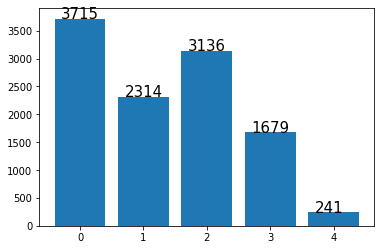

In [34]:
train_x,train_y = data.values[:,:-2], data.values[:,-1]
train_y = LabelEncoder().fit_transform(train_y)
plot_distribution(train_y)

In [35]:
corr = data.iloc[:,:-2].corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,PGA,PGV,SaTf5,SaTf6,SaTf7
PGA,1.000000,0.612926,0.845535,0.493300,0.325296
PGV,0.612926,1.000000,0.663812,0.891601,0.841408
SaTf5,0.845535,0.663812,1.000000,0.560457,0.412217
SaTf6,0.493300,0.891601,0.560457,1.000000,0.812833
SaTf7,0.325296,0.841408,0.412217,0.812833,1.000000


Text(0, 0.5, 'corr. coef.')

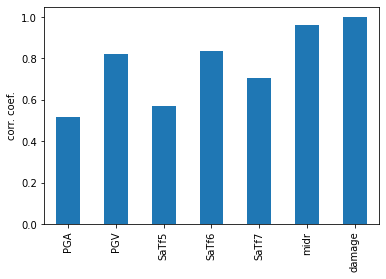

In [37]:
feature_target_corr = data[data.columns[:]].corr(method='spearman')['damage'][:]
ax = feature_target_corr.plot(kind='bar')
ax.set_ylabel("corr. coef.")

# Undersampling

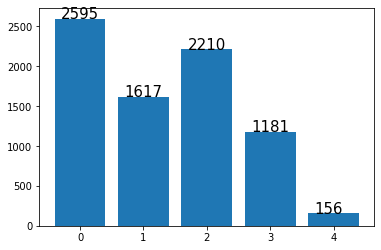

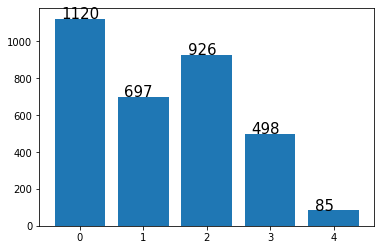

In [38]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.30)
plot_distribution(y_train)
plot_distribution(y_test)

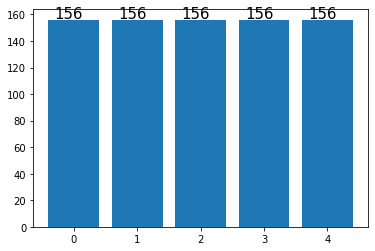

In [39]:
# Under sampling
undersample = RandomUnderSampler(sampling_strategy='auto')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
plot_distribution(y_train_under)

## Models training
### 1. Support Vector Machine (SVM)
### 2. Decision Tree (DT)
### 3. K Nearest Neighbors (KNN)
### 4. Naive Bayes Classifier (GNB)
### 5. Feedforward Neural Networks (FNN)
### 6. RandomForest (RFC)

In [40]:
# accuracies of each model
under_accuracy = []

### 1. SVM

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

svm_model = SVC(kernel = 'linear', C = 1).fit(X_train_under, y_train_under)
svm_predict = svm_model.predict(X_test)

# accuracy on X_test
accuracy = svm_model.score(X_test, y_test)
print(accuracy)
under_accuracy.append(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predict)
cm

0.6371016235718581


array([[851, 225,  44,   0,   0],
       [177, 355, 150,  15,   0],
       [ 11, 235, 516, 152,  12],
       [  0,   1,  72, 320, 105],
       [  0,   0,   0,   8,  77]])

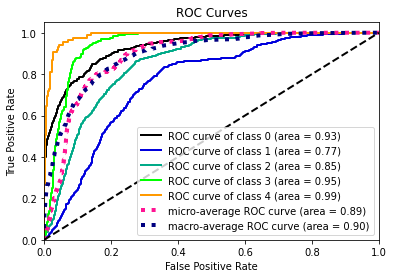

In [42]:
import scikitplot as skplt
p = np.array(svm_model.decision_function(X_test))
prob = np.exp(p)/np.sum(np.exp(p),axis=1, keepdims=True)
skplt.metrics.plot_roc(y_test, prob)
plt.show()

### 2. DT

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train_under, y_train_under)
tree_predict = tree_model.predict(X_test)

# accuracy on X_test
accuracy = tree_model.score(X_test, y_test)
print(accuracy)
under_accuracy.append(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, tree_predict)
cm

0.6070354780517138


array([[599, 469,  51,   1,   0],
       [ 47, 458, 181,  11,   0],
       [  0, 202, 581, 138,   5],
       [  0,   1, 123, 318,  56],
       [  0,   0,   0,  22,  63]])

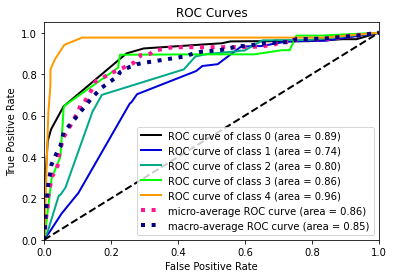

In [44]:
probs = tree_model.predict_proba(X_test)
p = np.array(probs)
prob = np.exp(p)/np.sum(np.exp(p),axis=1, keepdims=True)
skplt.metrics.plot_roc(y_test, prob)
plt.show()

### 3. KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_under, y_train_under)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
under_accuracy.append(accuracy)

# creating a confusion matrix
knn_predict = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predict)
cm

0.5938063740228503


array([[821, 244,  51,   4,   0],
       [192, 323, 163,  18,   1],
       [ 48, 214, 471, 177,  16],
       [  2,   7,  76, 289, 124],
       [  0,   0,   0,  14,  71]])

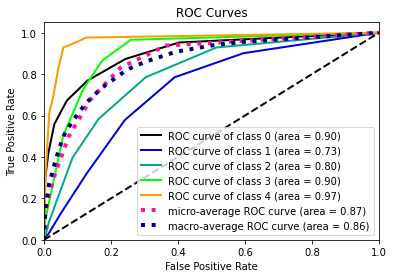

In [46]:
prob = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, prob)
plt.show()

### 4. GNB

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_under, y_train_under)
gnb_predict = gnb.predict(X_test)

# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
under_accuracy.append(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predict)
cm

0.600420926037282


array([[950, 134,  35,   1,   0],
       [307, 275,  96,  17,   2],
       [ 69, 312, 400, 126,  19],
       [  0,   4, 111, 303,  80],
       [  0,   0,   0,  16,  69]])

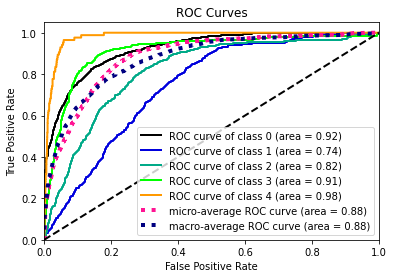

In [48]:
prob = gnb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, prob)
plt.show()

### 5. FNN

In [49]:
from sklearn.neural_network import MLPClassifier
fnn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=1, 
                    max_iter=1000).fit(X_train_under, y_train_under)

# accuracy on X_test
accuracy = fnn.score(X_test, y_test)
print(accuracy)
under_accuracy.append(accuracy)

# creating a confusion matrix
fnn_predict = fnn.predict(X_test)
cm = confusion_matrix(y_test, fnn_predict)
cm

0.6280817799158148


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([[809, 261,  48,   0,   2],
       [163, 372, 149,  12,   1],
       [ 15, 232, 506, 163,  10],
       [  0,   2,  72, 324, 100],
       [  0,   0,   1,   6,  78]])

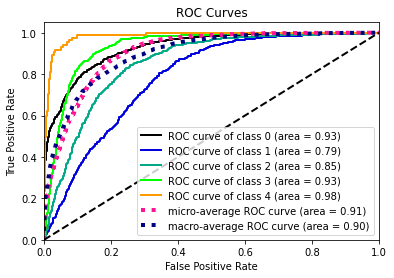

In [50]:
prob = fnn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, prob)
plt.show()

# 6. RF

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=4, random_state=0).fit(X_train_under, y_train_under)
rfc_predict = rfc.predict(X_test)

# accuracy on X_test
accuracy = rfc.score(X_test, y_test)
print(accuracy)
under_accuracy.append(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, rfc_predict)
cm

0.639807576668671


array([[742, 327,  49,   2,   0],
       [ 98, 409, 174,  15,   1],
       [  3, 188, 563, 162,  10],
       [  0,   1,  69, 334,  94],
       [  0,   0,   0,   5,  80]])

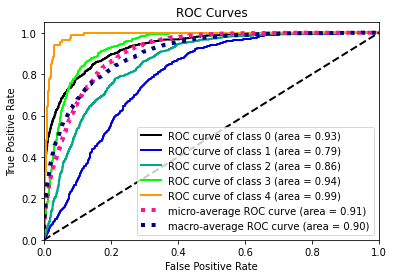

In [52]:
prob = rfc.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, prob)
plt.show()

Text(0, 0.5, 'accuracy')

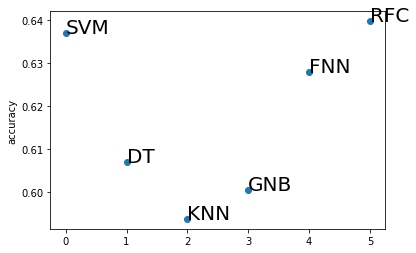

In [53]:
# plot validation accuracy of each model
under_models = ['SVM','DT','KNN','GNB','FNN','RFC']
fig, ax = plt.subplots()
ax.scatter(range(len(under_models)), under_accuracy)

for i, txt in enumerate(under_models):
    ax.annotate(txt, (i, under_accuracy[i]),fontsize=20)
ax.set_ylabel('accuracy')

# OverSampling

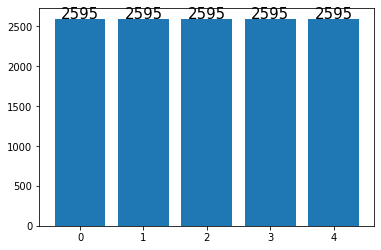

In [54]:
SMOTE = SMOTE()
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
plot_distribution(y_train_SMOTE)

In [55]:
# record accuracy of each model
over_accuracy = []

In [56]:
rfc = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train_SMOTE, y_train_SMOTE)
rfc_predict = rfc.predict(X_test)

# accuracy on X_test
accuracy = rfc.score(X_test, y_test)
print(accuracy)
over_accuracy.append(accuracy)

cm = confusion_matrix(y_test, rfc_predict)
cm

0.6449188214070956


array([[748, 321,  50,   1,   0],
       [ 98, 401, 185,  13,   0],
       [  1, 190, 564, 163,   8],
       [  0,   1,  52, 357,  88],
       [  0,   0,   0,  10,  75]])

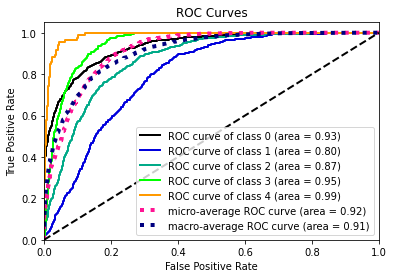

In [57]:
prob = rfc.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, prob)
plt.show()

In [58]:
fnn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=1, 
                    max_iter=2000).fit(X_train_SMOTE, y_train_SMOTE)

# accuracy on X_test
accuracy = fnn.score(X_test, y_test)
print(accuracy)
over_accuracy.append(accuracy)

fnn_predict = fnn.predict(X_test)
cm = confusion_matrix(y_test, fnn_predict)
cm

0.6380036079374625


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([[715, 359,  46,   0,   0],
       [ 88, 447, 146,  16,   0],
       [  1, 243, 533, 143,   6],
       [  0,   1,  69, 351,  77],
       [  0,   0,   0,   9,  76]])